In [3]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
#read in csv
survey_data_path = "survey_data.csv"
survey_data = pd.read_csv(survey_data_path)

In [5]:
#create dataframe
survey_df = pd.DataFrame(survey_data)
survey_df.head()

,ID_number,timestamp,age,gender,relationship_status,occupation_status,org_affiliations,use_social_media,facebook,twitter,...,feel_restless_wo_sm,how_easily_distracted,bothered_by_worries,difficult_to_concentrate,compare_self_to_others,feel_about_comparisons,seek_validation,feel_depressed,interest_in_daily_activ,sleep_issues
0,1,4/18/2022 19:18,21.0,Male,In a relationship,University Student,University,Yes,Yes,Yes,...,2,5,2,5,2,3,2,5,4,5
1,2,4/18/2022 19:19,21.0,Female,Single,University Student,University,Yes,Yes,Yes,...,2,4,5,4,5,1,1,5,4,5
2,3,4/18/2022 19:25,21.0,Female,Single,University Student,University,Yes,Yes,No,...,1,2,5,4,3,3,1,4,2,5
3,4,4/18/2022 19:29,21.0,Female,Single,University Student,University,Yes,Yes,No,...,1,3,5,3,5,1,2,4,3,2
4,5,4/18/2022 19:33,21.0,Female,Single,University Student,University,Yes,Yes,No,...,4,4,5,5,3,3,3,4,4,1


In [6]:
#count of null
#conclusion: only null in org_affiliations. not of concern.
nan_count = survey_df.isnull().sum()
print(f"number of NaN values{nan_count}")

number of NaN valuesID_number                            0
timestamp                            0
age                                  0
gender                               0
relationship_status                  0
occupation_status                    0
org_affiliations                    30
use_social_media                     0
facebook                             0
twitter                              0
instagram                            0
youtube                              0
snapchat                             0
discord                              0
reddit                               0
pinterest                            0
tiktok                               0
avg_time_per_day                     0
how_often_use_sm_without_purpose     0
how_often_distracted_by_sm           0
feel_restless_wo_sm                  0
how_easily_distracted                0
bothered_by_worries                  0
difficult_to_concentrate             0
compare_self_to_others               0
feel_

In [7]:
#create variable to hold gender count
gender = survey_df["gender"].value_counts()
gender

gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

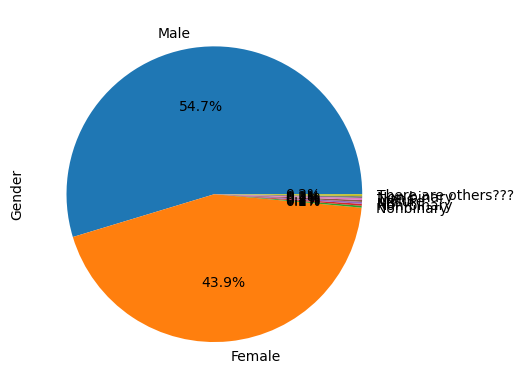

In [8]:
#create labels with elements in "gender" column
gender_labels = []
for i in survey_df["gender"]:
    if i not in gender_labels:
        gender_labels.append(i)

#create pie chart: use of Social Media by gender
gender.plot(kind = "pie", labels = gender_labels, autopct = "%1.1f%%", ylabel = "Gender")
plt.show()
    

In [9]:
#create stacked bar chart of social media usage by gender

#create a dataframe of social media platform by gender
platforms = ["Facebook", "Twitter", "Instagram", "YouTube", "Snapchat", "Discord", "Reddit", "Pinterest", "TikTok"]
platform_gender_dict = {"Gender":gender_labels,
                        "Facebook_count": "",
                        "Twitter_count": "",
                        "Instagram_count": "",
                        "YouTube_count": "",
                        "Snapchat_count": "",
                        "Discord_count": "",
                        "Reddit_count": "",
                        "Pinterest_count": "",
                        "TikTok_count": ""}
platform_gender_df = pd.DataFrame(platform_gender_dict)

In [10]:
platform_gender_df.set_index("Gender", inplace = True)

In [11]:
def platform_gender_fn(gendercol, platform_count, dfplatformcol):
    platform_gender_df.loc[gendercol,platform_count]=survey_df.loc[(survey_df["gender"] == gendercol) & (survey_df[dfplatformcol] == "Yes")].shape[0]

In [12]:
platform_gender_df.loc["Male","Facebook_count"]=survey_df.loc[(survey_df["gender"] == "Male") & (survey_df["facebook"] == "Yes")].shape[0]


In [13]:
for index, row in platform_gender_df.iterrows():
    platform_gender_fn(index, "Facebook_count", "facebook")
    platform_gender_fn(index, "Twitter_count", "twitter")
    platform_gender_fn(index, "Instagram_count", "instagram")
    platform_gender_fn(index, "YouTube_count", "youtube")
    platform_gender_fn(index, "Snapchat_count", "snapchat")
    platform_gender_fn(index, "Discord_count", "discord")
    platform_gender_fn(index, "Reddit_count", "reddit")
    platform_gender_fn(index, "Pinterest_count", "pinterest")
    platform_gender_fn(index, "TikTok_count", "tiktok")

In [14]:
platform_gender_df = platform_gender_df.T

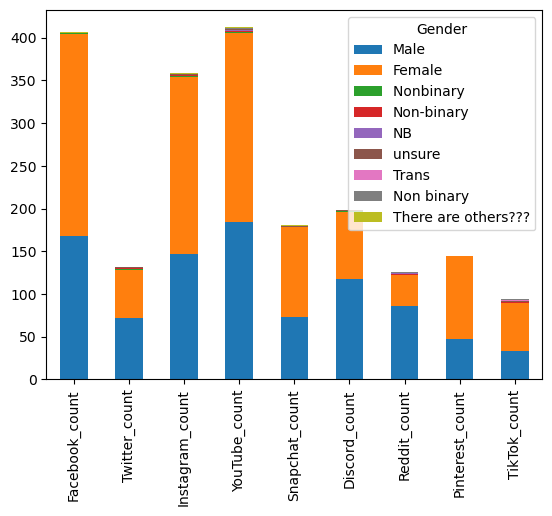

In [15]:
platform_gender_df.plot(kind = "bar", stacked = True, legend = True)
plt.show()

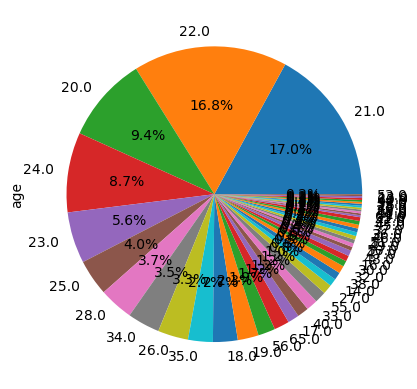

In [16]:
#Ages summary for entire dataset - pie chart
#create variable to hold ages count
age = survey_df["age"].value_counts()

#create labels with elements in "age" column
age_labels = []
for i in survey_df["age"]:
    if i not in age_labels:
        age_labels.append(i)

#create pie chart: use of Social Media by gender
age.plot(kind = "pie", labels = age_labels, autopct = "%1.1f%%", ylabel = "age")
plt.show()


In [39]:
#box and whiskers of age

#Determine outliers
quartiles = survey_df["age"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers = survey_df["age"].loc[(survey_df["age"] < lower_bound) | (survey_df["age"] > upper_bound)]
print(f"the lower bound of age is {lower_bound} and the upper bound is {upper_bound} with {len(list(outliers))} outliers: {list(outliers)}")

mean_age = survey_df["age"].mean()
median_age = survey_df["age"].median()

print(f"the mean age of the survey is {mean_age} and median is {median_age}")

the lower bound of age is 13.5 and the upper bound is 33.5 with 84 outliers: [34.0, 35.0, 35.0, 35.0, 56.0, 65.0, 40.0, 55.0, 38.0, 48.0, 47.0, 48.0, 47.0, 47.0, 34.0, 48.0, 50.0, 47.0, 38.0, 50.0, 49.0, 47.0, 48.0, 51.0, 50.0, 47.0, 40.0, 46.0, 47.0, 47.0, 48.0, 49.0, 47.0, 50.0, 48.0, 47.0, 36.0, 37.0, 48.0, 48.0, 48.0, 47.0, 47.0, 48.0, 48.0, 47.0, 35.0, 37.0, 48.0, 47.0, 45.0, 47.0, 47.0, 42.0, 35.0, 38.0, 34.0, 48.0, 37.0, 50.0, 46.0, 36.0, 69.0, 34.0, 34.0, 91.0, 36.0, 43.0, 37.0, 35.0, 52.0, 44.0, 44.0, 35.0, 60.0, 49.0, 34.0, 56.0, 51.0, 50.0, 13.0, 13.0, 35.0, 53.0]
the mean age of the survey is 26.13659043659044 and median is 22.0


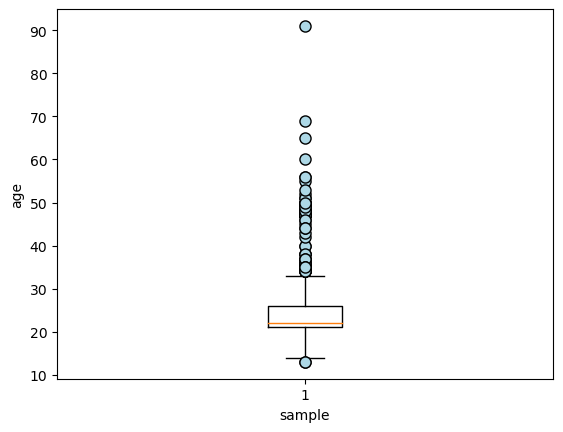

In [30]:
#plot box and whiskers
flierprops = dict(marker = "o", markerfacecolor = "lightblue", markersize = 8)
plt.boxplot(survey_df["age"], flierprops = flierprops)
plt.xlabel("sample")
plt.ylabel("age")
plt.show()

In [61]:
#value.counts of avg. time spent
avg_time = survey_df["avg_time_per_day"].value_counts()
avg_time_series = pd.Series(avg_time)

In [64]:
#create age labels
age_series = pd.Series(age)
age_labels = list(age_series.index)
len(age_labels)

46

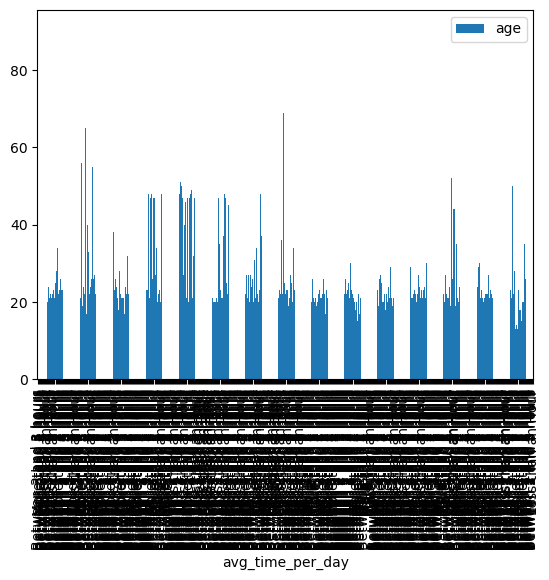

In [63]:
survey_df.plot(x = "avg_time_per_day", y = "age", kind = "bar", stacked = True, legend = True)
plt.show()

In [66]:
#create occupation labels
occupation = survey_df["occupation_status"].value_counts()
occupation_series = pd.Series(occupation)

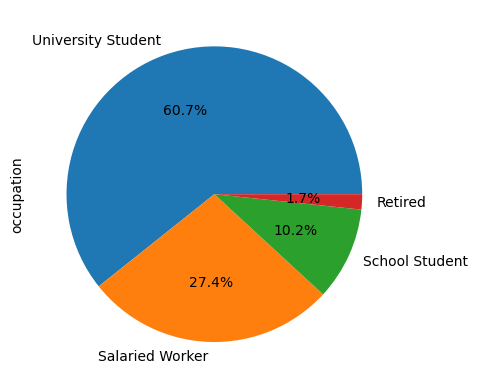

In [67]:
#create pie chart: occupation summary
occupation_series.plot(kind = "pie", labels = occupation_series.index, autopct = "%1.1f%%", ylabel = "occupation")
plt.show()

In [48]:
#plot avg. time spent groupby age

#time_spent = survey_df.groupby("age")

#create age bins
age_bins = [0, 18, 24, 30, 50, 92]
age_bin_labels = ["<18", "18-24", "25-30", "31-50", "50+"]

# #create dictionary for age_time df
# age_time_dict = {"age_range":age_bins,
#                "More than 5 hours":"",
#                "Between 4 and 5 hours":"",
#                "Between 3 and 4 hours":"",
#                 "Between 2 and 3 hours":"",
#                "Between 1 and 2 hours":"",
#                "Less than an Hour":""}
# #create dataframe
# age_time_df = pd.DataFrame(age_time_dict)
               
# age_time_df["Age Range"]=pd.cut(survey_df["age"], bins = age_bins, labels=age_labels, include_lowest=True)               
# #create labels for time spent